In [44]:
using DifferentialEquations
using PyPlot
using LaTeXStrings

PyPlot.matplotlib[:style][:use]("Solarize_Light2")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[44]:4
└ @ Core In[44]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[44]:4
└ @ Core In[44]:4


In [45]:
# specify tank geometry
H = 4.0
Lb = 5.0
Lt = 2.0
# specify resistance to flow
c = 1.0 

1.0

In [46]:
h₀ = 0.0 # initial liquid level
tspan = (0.0, 150.0) # solve for 0 s to 150 s

# inlet flow rate (could be funciton of time)
qᵢ = 1.5 # m³/s

# area from a helicopter view, m²
A(h, Lt, Lb, H) = (h/H * Lt + (1 - h/H) * Lb) ^ 2

# right-hand-side of ODE
rhs(h, p, t) = (qᵢ - c * sqrt(h)) / A(h, Lt, Lb, H)

# DifferentialEquations.jl syntax
prob = ODEProblem(rhs, h₀, tspan)
sol = solve(prob)

#
t = range(0.0, stop=tspan[2], length=300)
h = sol.(t)

300-element Array{Float64,1}:
 0.0                 
 0.027960221789287542
 0.05432771884095852 
 0.07974621458634379 
 0.10443720100732864 
 0.12852477707644852 
 0.152091259759157   
 0.17519501098187332 
 0.19788064289735482 
 0.2201835500474455  
 0.2421320913176929  
 0.2637495392072987  
 0.28505599756635996 
 ⋮                   
 2.197882193367937   
 2.1986567831947355  
 2.199420052086665   
 2.2001721622086015  
 2.2009132736823624  
 2.2016435445867097  
 2.202363130957348   
 2.203072186786925   
 2.2037708640250315  
 2.204459312578201   
 2.2051376803099103  
 2.2058061130405795  

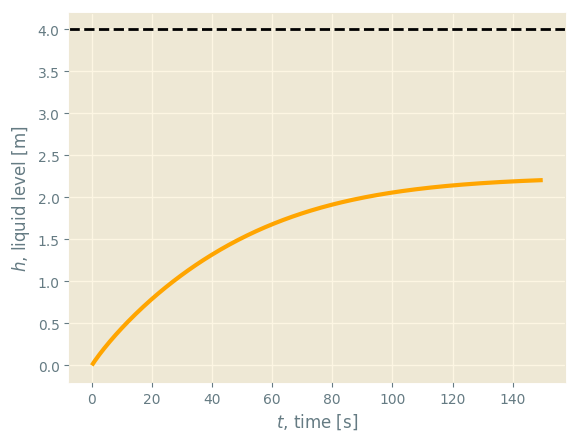

┌ Warning: `haskey(o::PyObject, s::Union{Symbol, AbstractString})` is deprecated, use `hasproperty(o, s)` instead.
│   caller = #savefig#97(::Base.Iterators.Pairs{Symbol,Any,Tuple{Symbol,Symbol},NamedTuple{(:format, :dpi),Tuple{String,Int64}}}, ::Function, ::String) at PyPlot.jl:176
└ @ PyPlot /home/cokes/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:176
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #savefig#97(::Base.Iterators.Pairs{Symbol,Any,Tuple{Symbol,Symbol},NamedTuple{(:format, :dpi),Tuple{String,Int64}}}, ::Function, ::String) at PyPlot.jl:179
└ @ PyPlot /home/cokes/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:179


In [51]:
figure()
axhline(y=H, linestyle="--", color="k")
xlabel(L"$t$, time [s]")
ylabel(L"$h$, liquid level [m]")
plot(t, h, lw=3, color="orange")
savefig("numerical_soln.png", format="png", dpi=300)